In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Kaggle Îç∞Ïù¥ÌÑ∞ Î°úÎìú
wine_df = pd.read_csv('./winequality-red.csv')

print(f"Ï¥ù ÏôÄÏù∏ ÏÉòÌîå: {len(wine_df)}Í∞ú")
print(f"ÌäπÏÑ± Í∞úÏàò: {len(wine_df.columns)-1}Í∞ú")
print(f"ÌíàÏßà Î≤îÏúÑ: {wine_df['quality'].min()}Ï†ê ~ {wine_df['quality'].max()}Ï†ê")
print("\nüìä Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
wine_df.head()


Ï¥ù ÏôÄÏù∏ ÏÉòÌîå: 1599Í∞ú
ÌäπÏÑ± Í∞úÏàò: 11Í∞ú
ÌíàÏßà Î≤îÏúÑ: 3Ï†ê ~ 8Ï†ê

üìä Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

  fixed acidity       : Í≥†Ï†ï ÏÇ∞ÎèÑ - ÏôÄÏù∏Ïùò Ïã†ÎßõÍ≥º Î≥¥Ï°¥ÏÑ±
  volatile acidity    : ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ - ÏãùÏ¥à Îßõ, ÎÜíÏúºÎ©¥ Î∂àÏæåÌïú ÎÉÑÏÉà
  citric acid         : Íµ¨Ïó∞ÏÇ∞ - Ïã†ÏÑ†Ìï®Í≥º Í≥ºÏùº Ìñ•
  residual sugar      : ÏûîÎãπ - Îã®ÎßõÏùò Ï†ïÎèÑ
  chlorides           : ÏóºÎ∂Ñ - Ïß†Îßõ
  free sulfur dioxide : ÏûêÏú† Ïù¥ÏÇ∞ÌôîÌô© - ÏÇ∞Ìôî Î∞©ÏßÄ
  total sulfur dioxide: Ï¥ù Ïù¥ÏÇ∞ÌôîÌô© - Î≥¥Ï°¥Ï†ú
  density             : Î∞ÄÎèÑ - ÎãπÎ∂ÑÍ≥º ÏïåÏΩîÏò¨Ïóê ÏòÅÌñ•
  pH                  : ÏÇ∞ÏÑ±ÎèÑ - 3-4Í∞Ä Ïù¥ÏÉÅÏ†Å
  sulphates           : Ìô©ÏÇ∞Ïóº - Ìï≠ÏÇ∞ÌôîÏ†ú, ÌíàÏßà Ìñ•ÏÉÅ
  alcohol             : ÏïåÏΩîÏò¨ ÎèÑÏàò - ÎßõÍ≥º Î≥¥ÎîîÍ∞ê


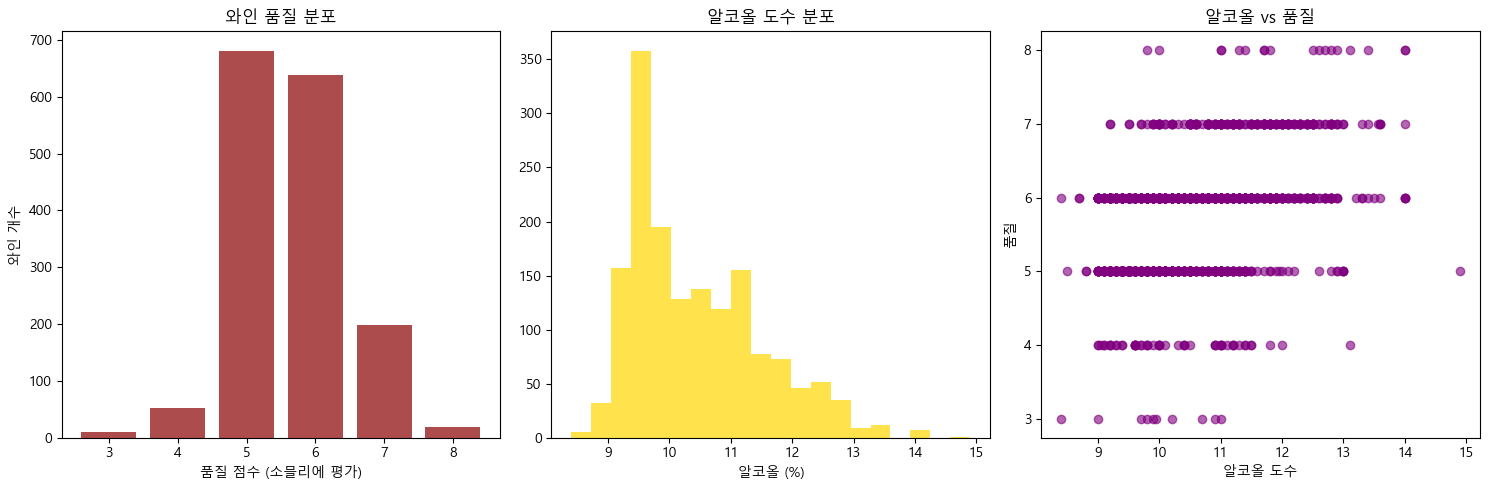


üí° Î∞úÍ≤¨:
  ‚Ä¢ ÎåÄÎ∂ÄÎ∂Ñ ÏôÄÏù∏Ïù¥ 5-6Ï†ê (Î≥¥ÌÜµ ÌíàÏßà)
  ‚Ä¢ ÏïåÏΩîÏò¨ ÎèÑÏàòÎäî 8-15% Î≤îÏúÑ
  ‚Ä¢ Í≥†Í∏â ÏôÄÏù∏ (8-9Ï†ê)ÏùÄ Ìù¨Í∑Ä!


In [7]:
features_explanation = {
    'fixed acidity': 'Í≥†Ï†ï ÏÇ∞ÎèÑ - ÏôÄÏù∏Ïùò Ïã†ÎßõÍ≥º Î≥¥Ï°¥ÏÑ±',
    'volatile acidity': 'ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ - ÏãùÏ¥à Îßõ, ÎÜíÏúºÎ©¥ Î∂àÏæåÌïú ÎÉÑÏÉà',
    'citric acid': 'Íµ¨Ïó∞ÏÇ∞ - Ïã†ÏÑ†Ìï®Í≥º Í≥ºÏùº Ìñ•',
    'residual sugar': 'ÏûîÎãπ - Îã®ÎßõÏùò Ï†ïÎèÑ',
    'chlorides': 'ÏóºÎ∂Ñ - Ïß†Îßõ',
    'free sulfur dioxide': 'ÏûêÏú† Ïù¥ÏÇ∞ÌôîÌô© - ÏÇ∞Ìôî Î∞©ÏßÄ',
    'total sulfur dioxide': 'Ï¥ù Ïù¥ÏÇ∞ÌôîÌô© - Î≥¥Ï°¥Ï†ú',
    'density': 'Î∞ÄÎèÑ - ÎãπÎ∂ÑÍ≥º ÏïåÏΩîÏò¨Ïóê ÏòÅÌñ•',
    'pH': 'ÏÇ∞ÏÑ±ÎèÑ - 3-4Í∞Ä Ïù¥ÏÉÅÏ†Å',
    'sulphates': 'Ìô©ÏÇ∞Ïóº - Ìï≠ÏÇ∞ÌôîÏ†ú, ÌíàÏßà Ìñ•ÏÉÅ',
    'alcohol': 'ÏïåÏΩîÏò¨ ÎèÑÏàò - ÎßõÍ≥º Î≥¥ÎîîÍ∞ê'
}

for feature, explanation in features_explanation.items():
    print(f"  {feature:20s}: {explanation}")

# ÏôÄÏù∏ ÌíàÏßà Î∂ÑÌè¨ - ÏÜåÎØàÎ¶¨ÏóêÎì§Ïùò ÌèâÍ∞Ä!
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
quality_counts = wine_df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='darkred', alpha=0.7)
plt.title('ÏôÄÏù∏ ÌíàÏßà Î∂ÑÌè¨')
plt.xlabel('ÌíàÏßà Ï†êÏàò (ÏÜåÎØàÎ¶¨Ïóê ÌèâÍ∞Ä)')
plt.ylabel('ÏôÄÏù∏ Í∞úÏàò')

plt.subplot(1, 3, 2)
plt.hist(wine_df['alcohol'], bins=20, color='gold', alpha=0.7)
plt.title('ÏïåÏΩîÏò¨ ÎèÑÏàò Î∂ÑÌè¨')
plt.xlabel('ÏïåÏΩîÏò¨ (%)')

plt.subplot(1, 3, 3)
plt.scatter(wine_df['alcohol'], wine_df['quality'], alpha=0.6, color='purple')
plt.title('ÏïåÏΩîÏò¨ vs ÌíàÏßà')
plt.xlabel('ÏïåÏΩîÏò¨ ÎèÑÏàò')
plt.ylabel('ÌíàÏßà')

plt.tight_layout()
plt.show()

print(f"\nüí° Î∞úÍ≤¨:")
print(f"  ‚Ä¢ ÎåÄÎ∂ÄÎ∂Ñ ÏôÄÏù∏Ïù¥ 5-6Ï†ê (Î≥¥ÌÜµ ÌíàÏßà)")
print(f"  ‚Ä¢ ÏïåÏΩîÏò¨ ÎèÑÏàòÎäî 8-15% Î≤îÏúÑ")
print(f"  ‚Ä¢ Í≥†Í∏â ÏôÄÏù∏ (8-9Ï†ê)ÏùÄ Ìù¨Í∑Ä!")


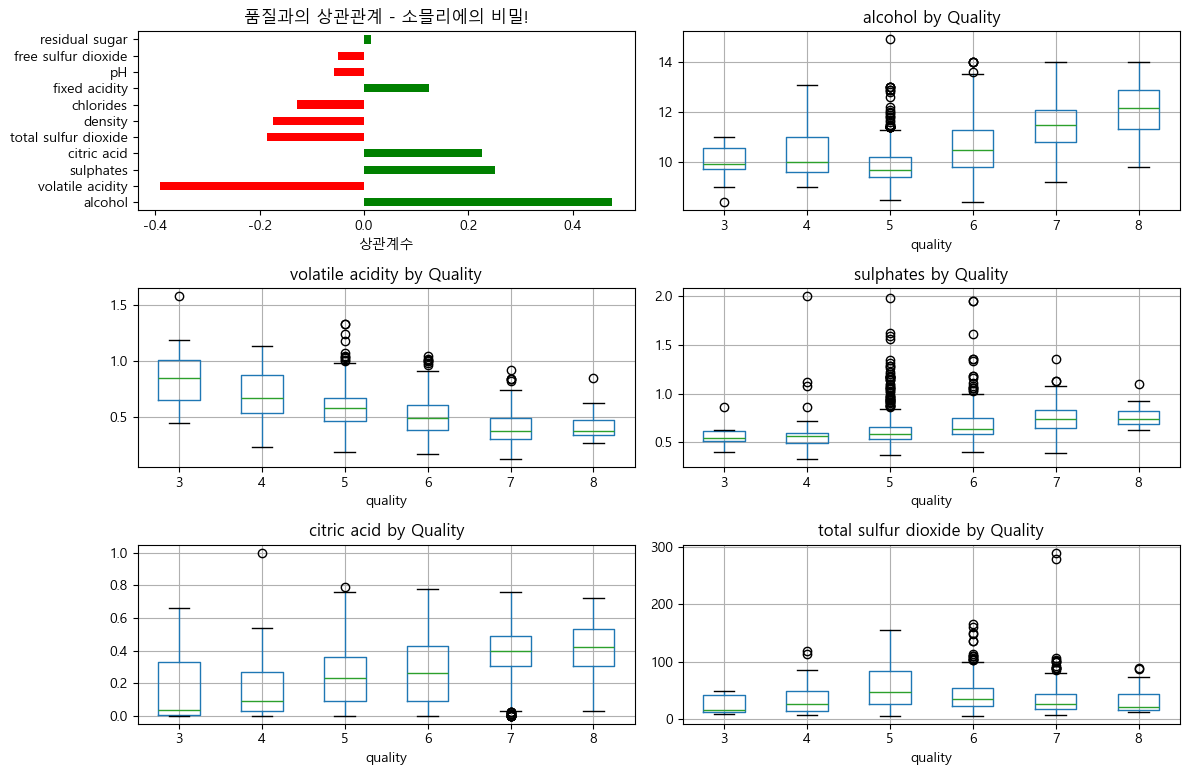

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏàúÏúÑ:
 1. alcohol             :  0.476
 2. volatile acidity    : -0.391
 3. sulphates           :  0.251
 4. citric acid         :  0.226
 5. total sulfur dioxide: -0.185
 6. density             : -0.175
 7. chlorides           : -0.129
 8. fixed acidity       :  0.124
 9. pH                  : -0.058
10. free sulfur dioxide : -0.051
11. residual sugar      :  0.014


In [16]:
# ÌíàÏßàÍ≥º Í∞ÄÏû• Í¥ÄÎ†® ÎÜíÏùÄ ÌäπÏÑ±Îì§ Ï∞æÍ∏∞

correlations = wine_df.corr()['quality'].drop('quality').sort_values(key=abs, ascending=False)

plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
correlations.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlations])
plt.title('ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ - ÏÜåÎØàÎ¶¨ÏóêÏùò ÎπÑÎ∞Ä!')
plt.xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò')

# ÏÉÅÏúÑ ÌäπÏÑ±Îì§Ïùò ÌíàÏßàÎ≥Ñ Î∂ÑÌè¨
plt.subplot(3, 2, 2)
top_features = correlations.abs().head(5).index
for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i+2)
    wine_df.boxplot(column=feature, by='quality', ax=plt.gca())
    plt.title(f'{feature} by Quality')
    plt.suptitle('')

plt.tight_layout()
plt.show()

print("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏàúÏúÑ:")
for i, (feature, corr) in enumerate(correlations.items(), 1):
    print(f"{i:2d}. {feature:20s}: {corr:6.3f}")


In [ ]:
print("üéØ ÎØ∏ÏÖò ÏÑ†ÌÉùÏùò ÏãúÍ∞Ñ!")
print("\nÏòµÏÖò 1: ÌöåÍ∑Ä Î¨∏Ï†ú - Ï†ïÌôïÌïú ÌíàÏßà Ï†êÏàò ÏòàÏ∏°")
print("  ‚Ä¢ Î™©Ìëú: 5.6Ï†ê, 6.2Ï†ê Í∞ôÏùÄ Ïó∞ÏÜçÏ†Å Ï†êÏàò")
print("  ‚Ä¢ ÌèâÍ∞Ä: R¬≤ Score, RMSE")
print("  ‚Ä¢ Ïû•Ï†ê: ÏÑ∏Î∞ÄÌïú ÏòàÏ∏° Í∞ÄÎä•")

print("\nÏòµÏÖò 2: Î∂ÑÎ•ò Î¨∏Ï†ú - ÌíàÏßà Îì±Í∏â Î∂ÑÎ•ò")
print("  ‚Ä¢ Î™©Ìëú: Ï†ÄÌíàÏßà(3-5Ï†ê), Î≥¥ÌÜµ(6Ï†ê), Í≥†ÌíàÏßà(7-9Ï†ê)")
print("  ‚Ä¢ ÌèâÍ∞Ä: Accuracy, F1-Score") 
print("  ‚Ä¢ Ïû•Ï†ê: ÎπÑÏ¶àÎãàÏä§ÏóêÏÑú Îçî Ïã§Ïö©Ï†Å")

print("\nüöÄ Ïö∞Î¶¨Ïùò ÏÑ†ÌÉù: Îëò Îã§ Ìï¥Î≥¥Ïûê!")

# Î∂ÑÎ•òÎ•º ÏúÑÌïú ÌÉÄÍ≤ü ÏÉùÏÑ±
def categorize_wine_quality(quality):
    if quality <= 5:
        return 0  # Ï†ÄÌíàÏßà
    elif quality == 6:
        return 1  # Î≥¥ÌÜµÌíàÏßà  
    else:
        return 2  # Í≥†ÌíàÏßà

wine_df['quality_category'] = wine_df['quality'].apply(categorize_wine_quality)
quality_labels = {0: 'Ï†ÄÌíàÏßà (3-5Ï†ê)', 1: 'Î≥¥ÌÜµÌíàÏßà (6Ï†ê)', 2: 'Í≥†ÌíàÏßà (7-9Ï†ê)'}

print("\nüè∑Ô∏è ÌíàÏßà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨:")
category_counts = wine_df['quality_category'].value_counts().sort_index()
for cat, count in category_counts.items():
    print(f"  {quality_labels[cat]}: {count}Í∞ú ({count/len(wine_df)*100:.1f}%)")

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = wine_df.drop(['quality', 'quality_category'], axis=1)
y_regression = wine_df['quality']  # ÌöåÍ∑ÄÏö©
y_classification = wine_df['quality_category']  # Î∂ÑÎ•òÏö©

print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å!")
print(f"ÌäπÏÑ± Í∞úÏàò: {len(X.columns)}")
print(f"ÏÉòÌîå Ïàò: {len(X)}")

üéØ ÎØ∏ÏÖò ÏÑ†ÌÉùÏùò ÏãúÍ∞Ñ!

ÏòµÏÖò 1: ÌöåÍ∑Ä Î¨∏Ï†ú - Ï†ïÌôïÌïú ÌíàÏßà Ï†êÏàò ÏòàÏ∏°
  ‚Ä¢ Î™©Ìëú: 5.6Ï†ê, 6.2Ï†ê Í∞ôÏùÄ Ïó∞ÏÜçÏ†Å Ï†êÏàò
  ‚Ä¢ ÌèâÍ∞Ä: R¬≤ Score, RMSE
  ‚Ä¢ Ïû•Ï†ê: ÏÑ∏Î∞ÄÌïú ÏòàÏ∏° Í∞ÄÎä•

ÏòµÏÖò 2: Î∂ÑÎ•ò Î¨∏Ï†ú - ÌíàÏßà Îì±Í∏â Î∂ÑÎ•ò
  ‚Ä¢ Î™©Ìëú: Ï†ÄÌíàÏßà(3-5Ï†ê), Î≥¥ÌÜµ(6Ï†ê), Í≥†ÌíàÏßà(7-9Ï†ê)
  ‚Ä¢ ÌèâÍ∞Ä: Accuracy, F1-Score
  ‚Ä¢ Ïû•Ï†ê: ÎπÑÏ¶àÎãàÏä§ÏóêÏÑú Îçî Ïã§Ïö©Ï†Å

üöÄ Ïö∞Î¶¨Ïùò ÏÑ†ÌÉù: Îëò Îã§ Ìï¥Î≥¥Ïûê!

üè∑Ô∏è ÌíàÏßà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨:
  Ï†ÄÌíàÏßà (3-5Ï†ê): 744Í∞ú (46.5%)
  Î≥¥ÌÜµÌíàÏßà (6Ï†ê): 638Í∞ú (39.9%)
  Í≥†ÌíàÏßà (7-9Ï†ê): 217Í∞ú (13.6%)

‚úÖ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å!
ÌäπÏÑ± Í∞úÏàò: 11
ÏÉòÌîå Ïàò: 1599


In [19]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌöåÍ∑Ä)
X_train, X_val, y_reg_train, y_reg_val = train_test_split(
    X, y_regression, test_size=0.2, random_state=42)

# Î∂ÑÎ•òÏö©ÎèÑ Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú Î∂ÑÌï†
_, _, y_cls_train, y_cls_val = train_test_split(
    X, y_classification, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"üîÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å!")
print(f"ÌõàÎ†®: {len(X_train)} | Í≤ÄÏ¶ù: {len(X_val)}")


üîÑ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å!
ÌõàÎ†®: 1279 | Í≤ÄÏ¶ù: 320


In [22]:
regression_results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_reg_train)
lr_score = lr_model.score(X_val_scaled, y_reg_val)
lr_pred = lr_model.predict(X_val_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_reg_val, lr_pred))
regression_results['Linear Regression'] = {'r2': lr_score, 'rmse': lr_rmse}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_reg_train)
ridge_score = ridge_model.score(X_val_scaled, y_reg_val)
ridge_pred = ridge_model.predict(X_val_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_reg_val, ridge_pred))
regression_results['Ridge'] = {'r2': ridge_score, 'rmse': ridge_rmse}

# 3. Lasso Regression  
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_reg_train)
lasso_score = lasso_model.score(X_val_scaled, y_reg_val)
lasso_pred = lasso_model.predict(X_val_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_reg_val, lasso_pred))
regression_results['Lasso'] = {'r2': lasso_score, 'rmse': lasso_rmse}

# 4. Polynomial Features + Ridge
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

poly_ridge = Ridge(alpha=10.0)  # Îçî Í∞ïÌïú Í∑úÏ†ú
poly_ridge.fit(X_train_poly, y_reg_train)
poly_score = poly_ridge.score(X_val_poly, y_reg_val)
poly_pred = poly_ridge.predict(X_val_poly)
poly_rmse = np.sqrt(mean_squared_error(y_reg_val, poly_pred))
regression_results['Polynomial Ridge'] = {'r2': poly_score, 'rmse': poly_rmse}

for model, scores in regression_results.items():
    print(f"  {model:18s}: R¬≤={scores['r2']:.4f}, RMSE={scores['rmse']:.4f}")

print(f"ÌäπÏÑ± Ïàò Î≥ÄÌôî: {X_train_scaled.shape[1]} ‚Üí {X_train_poly.shape[1]} (Îã§Ìï≠Ïãù)")


  Linear Regression : R¬≤=0.4032, RMSE=0.6245
  Ridge             : R¬≤=0.4032, RMSE=0.6245
  Lasso             : R¬≤=0.3986, RMSE=0.6269
  Polynomial Ridge  : R¬≤=0.4299, RMSE=0.6104
ÌäπÏÑ± Ïàò Î≥ÄÌôî: 11 ‚Üí 66 (Îã§Ìï≠Ïãù)


In [23]:

# KNN with Cross Validation
k_range = [3, 5, 7, 10, 15, 20]
knn_cv_scores = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train_scaled, y_reg_train, cv=5, scoring='r2')
    knn_cv_scores.append(cv_scores.mean())
    print(f"  KNN (K={k:2d}): CV R¬≤ = {cv_scores.mean():.4f} (¬±{cv_scores.std():.4f})")

best_k = k_range[np.argmax(knn_cv_scores)]
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_reg_train)
knn_score = knn_best.score(X_val_scaled, y_reg_val)
knn_pred = knn_best.predict(X_val_scaled)
knn_rmse = np.sqrt(mean_squared_error(y_reg_val, knn_pred))
regression_results[f'KNN (K={best_k})'] = {'r2': knn_score, 'rmse': knn_rmse}

print(f"\nüèÜ ÏµúÏ†Å KNN: K={best_k}, R¬≤={knn_score:.4f}, RMSE={knn_rmse:.4f}")


  KNN (K= 3): CV R¬≤ = 0.2008 (¬±0.0427)
  KNN (K= 5): CV R¬≤ = 0.2418 (¬±0.0478)
  KNN (K= 7): CV R¬≤ = 0.2591 (¬±0.0443)
  KNN (K=10): CV R¬≤ = 0.2745 (¬±0.0602)
  KNN (K=15): CV R¬≤ = 0.2918 (¬±0.0607)
  KNN (K=20): CV R¬≤ = 0.3003 (¬±0.0630)

üèÜ ÏµúÏ†Å KNN: K=20, R¬≤=0.3744, RMSE=0.6394


In [24]:

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_model.fit(X_train, y_reg_train)  # Ïä§ÏºÄÏùºÎßÅ Î∂àÌïÑÏöî
dt_score = dt_model.score(X_val, y_reg_val)
dt_pred = dt_model.predict(X_val)
dt_rmse = np.sqrt(mean_squared_error(y_reg_val, dt_pred))
regression_results['Decision Tree'] = {'r2': dt_score, 'rmse': dt_rmse}

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_reg_train)
rf_score = rf_model.score(X_val, y_reg_val)
rf_pred = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_reg_val, rf_pred))
regression_results['Random Forest'] = {'r2': rf_score, 'rmse': rf_rmse}

# Extra Trees
et_model = ExtraTreesRegressor(n_estimators=100, max_depth=8, random_state=42)
et_model.fit(X_train, y_reg_train)
et_score = et_model.score(X_val, y_reg_val)
et_pred = et_model.predict(X_val)
et_rmse = np.sqrt(mean_squared_error(y_reg_val, et_pred))
regression_results['Extra Trees'] = {'r2': et_score, 'rmse': et_rmse}

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42)
gb_model.fit(X_train, y_reg_train)
gb_score = gb_model.score(X_val, y_reg_val)
gb_pred = gb_model.predict(X_val)
gb_rmse = np.sqrt(mean_squared_error(y_reg_val, gb_pred))
regression_results['Gradient Boosting'] = {'r2': gb_score, 'rmse': gb_rmse}

tree_models = ['Decision Tree', 'Random Forest', 'Extra Trees', 'Gradient Boosting']
for model in tree_models:
    scores = regression_results[model]
    print(f"  {model:18s}: R¬≤={scores['r2']:.4f}, RMSE={scores['rmse']:.4f}")


  Decision Tree     : R¬≤=0.1868, RMSE=0.7290
  Random Forest     : R¬≤=0.4949, RMSE=0.5746
  Extra Trees       : R¬≤=0.4824, RMSE=0.5816
  Gradient Boosting : R¬≤=0.4700, RMSE=0.5885


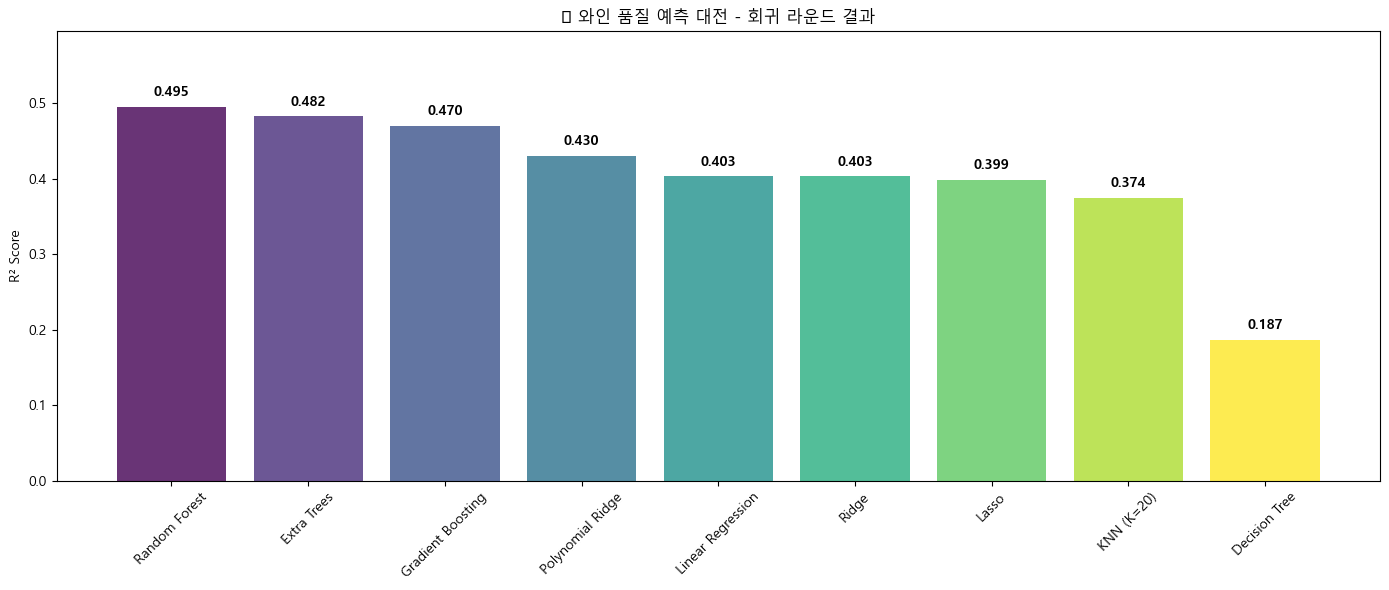


ü•á ÌöåÍ∑Ä ÎùºÏö¥Îìú Ïö∞ÏäπÏûê: Random Forest
üèÜ ÏµúÍ≥† ÏÑ±Îä•: R¬≤ = 0.4949
üéØ Ìï¥ÏÑù: ÌíàÏßà Î≥ÄÎèôÏùò 49.5%Î•º ÏÑ§Î™Ö Í∞ÄÎä•!
‚úÖ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•! Í≤ΩÌñ•ÏÑ± ÌååÏïÖÏóê Ïú†Ïö©


In [25]:
# ÌöåÍ∑Ä Í≤∞Í≥º Ï†ïÎ†¨ Î∞è ÏãúÍ∞ÅÌôî
regression_sorted = dict(sorted(regression_results.items(), 
                                key=lambda x: x[1]['r2'], reverse=True))

plt.figure(figsize=(14, 6))
models = list(regression_sorted.keys())
r2_scores = [regression_sorted[model]['r2'] for model in models]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

bars = plt.bar(models, r2_scores, color=colors, alpha=0.8)
plt.title('üç∑ ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° ÎåÄÏ†Ñ - ÌöåÍ∑Ä ÎùºÏö¥Îìú Í≤∞Í≥º')
plt.ylabel('R¬≤ Score')
plt.xticks(rotation=45)
plt.ylim(0, max(r2_scores) + 0.1)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ÏäπÏûê Î∞úÌëú
regression_winner = models[0]
winner_score = r2_scores[0]
print(f"\nü•á ÌöåÍ∑Ä ÎùºÏö¥Îìú Ïö∞ÏäπÏûê: {regression_winner}")
print(f"üèÜ ÏµúÍ≥† ÏÑ±Îä•: R¬≤ = {winner_score:.4f}")
print(f"üéØ Ìï¥ÏÑù: ÌíàÏßà Î≥ÄÎèôÏùò {winner_score*100:.1f}%Î•º ÏÑ§Î™Ö Í∞ÄÎä•!")

if winner_score > 0.6:
    print("‚úÖ ÌõåÎ•≠Ìïú ÏÑ±Îä•! Ïã§Î¨¥ÏóêÏÑú Ï∂©Î∂ÑÌûà ÌôúÏö© Í∞ÄÎä•")
elif winner_score > 0.4:
    print("‚úÖ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•! Í≤ΩÌñ•ÏÑ± ÌååÏïÖÏóê Ïú†Ïö©")
else:
    print("ü§î ÏïÑÏßÅ Í∞úÏÑ† Ïó¨ÏßÄÍ∞Ä ÏûàÏñ¥Ïöî")


In [27]:
classification_results = {}

# KNN Classification
knn_cls = KNeighborsClassifier(n_neighbors=best_k)
knn_cls.fit(X_train_scaled, y_cls_train)
knn_cls_score = knn_cls.score(X_val_scaled, y_cls_val)
classification_results[f'KNN (K={best_k})'] = knn_cls_score

# Logistic Regression
lr_cls = LogisticRegression(random_state=42, max_iter=1000)
lr_cls.fit(X_train_scaled, y_cls_train)
lr_cls_score = lr_cls.score(X_val_scaled, y_cls_val)
classification_results['Logistic Regression'] = lr_cls_score

# Polynomial Logistic Regression
poly_lr_cls = LogisticRegression(random_state=42, max_iter=1000)
poly_lr_cls.fit(X_train_poly, y_cls_train)
poly_lr_score = poly_lr_cls.score(X_val_poly, y_cls_val)
classification_results['Polynomial Logistic'] = poly_lr_score

# Decision Tree Classification
dt_cls = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_cls.fit(X_train, y_cls_train)
dt_cls_score = dt_cls.score(X_val, y_cls_val)
classification_results['Decision Tree'] = dt_cls_score

# Random Forest Classification
rf_cls = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_cls.fit(X_train, y_cls_train)
rf_cls_score = rf_cls.score(X_val, y_cls_val)
classification_results['Random Forest'] = rf_cls_score

# Extra Trees Classification
et_cls = ExtraTreesClassifier(n_estimators=100, max_depth=8, random_state=42)
et_cls.fit(X_train, y_cls_train)
et_cls_score = et_cls.score(X_val, y_cls_val)
classification_results['Extra Trees'] = et_cls_score

# Gradient Boosting Classification
gb_cls = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42)
gb_cls.fit(X_train, y_cls_train)
gb_cls_score = gb_cls.score(X_val, y_cls_val)
classification_results['Gradient Boosting'] = gb_cls_score

print("üìä Î∂ÑÎ•ò ÎùºÏö¥Îìú Í≤∞Í≥º:")
for model, score in classification_results.items():
    print(f"  {model:20s}: Ï†ïÌôïÎèÑ = {score:.4f}")


üìä Î∂ÑÎ•ò ÎùºÏö¥Îìú Í≤∞Í≥º:
  KNN (K=20)          : Ï†ïÌôïÎèÑ = 0.5844
  Logistic Regression : Ï†ïÌôïÎèÑ = 0.6250
  Polynomial Logistic : Ï†ïÌôïÎèÑ = 0.6219
  Decision Tree       : Ï†ïÌôïÎèÑ = 0.6250
  Random Forest       : Ï†ïÌôïÎèÑ = 0.6562
  Extra Trees         : Ï†ïÌôïÎèÑ = 0.6438
  Gradient Boosting   : Ï†ïÌôïÎèÑ = 0.6687


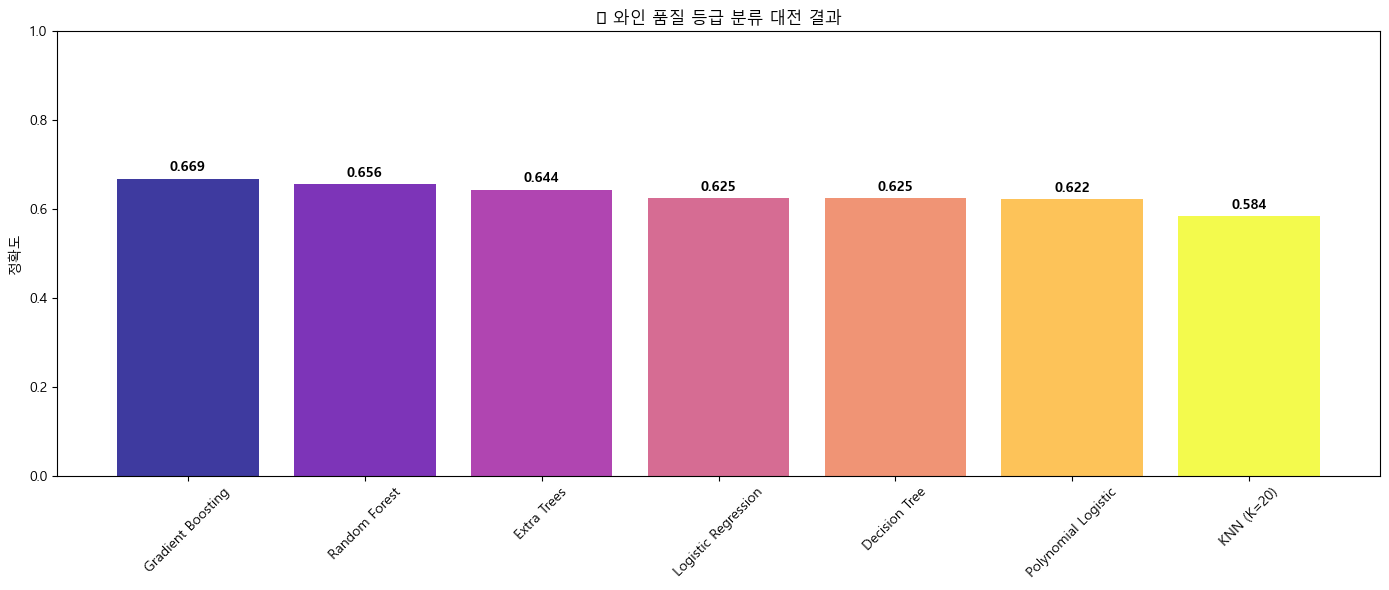


ü•á Î∂ÑÎ•ò ÎùºÏö¥Îìú Ïö∞ÏäπÏûê: Gradient Boosting
üèÜ ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.6687


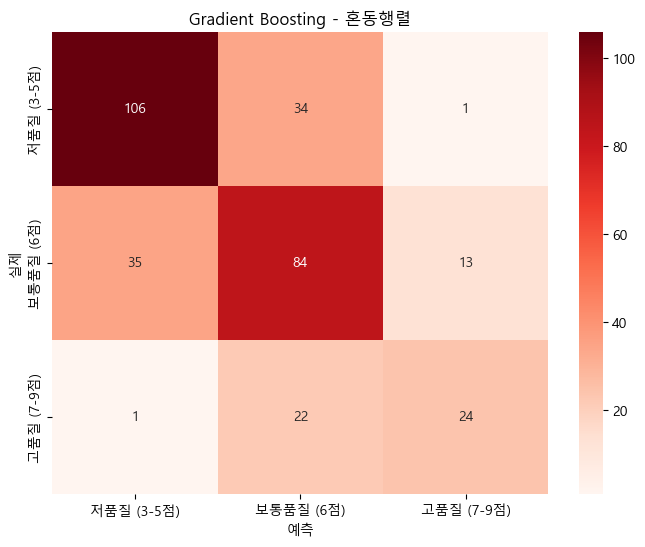


üìä Îì±Í∏âÎ≥Ñ ÏòàÏ∏° ÏÑ±Îä•:
  Ï†ÄÌíàÏßà (3-5Ï†ê)     : 0.752 (106/141)
  Î≥¥ÌÜµÌíàÏßà (6Ï†ê)      : 0.636 (84/132)
  Í≥†ÌíàÏßà (7-9Ï†ê)     : 0.511 (24/47)


In [28]:
# Î∂ÑÎ•ò Í≤∞Í≥º ÏãúÍ∞ÅÌôî
classification_sorted = dict(sorted(classification_results.items(), 
                                   key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
models = list(classification_sorted.keys())
acc_scores = list(classification_sorted.values())
colors = plt.cm.plasma(np.linspace(0, 1, len(models)))

bars = plt.bar(models, acc_scores, color=colors, alpha=0.8)
plt.title('üç∑ ÏôÄÏù∏ ÌíàÏßà Îì±Í∏â Î∂ÑÎ•ò ÎåÄÏ†Ñ Í≤∞Í≥º')
plt.ylabel('Ï†ïÌôïÎèÑ')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar, score in zip(bars, acc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Î∂ÑÎ•ò Ïö∞ÏäπÏûê ÏÉÅÏÑ∏ Î∂ÑÏÑù
classification_winner = models[0]
winner_cls_score = acc_scores[0]

print(f"\nü•á Î∂ÑÎ•ò ÎùºÏö¥Îìú Ïö∞ÏäπÏûê: {classification_winner}")
print(f"üèÜ ÏµúÍ≥† Ï†ïÌôïÎèÑ: {winner_cls_score:.4f}")

# ÏµúÍ≥† Î™®Îç∏Ïùò ÌòºÎèôÌñâÎ†¨
if 'Random Forest' in classification_winner:
    best_cls_model = rf_cls
elif 'Gradient Boosting' in classification_winner:
    best_cls_model = gb_cls
elif 'Extra Trees' in classification_winner:
    best_cls_model = et_cls
elif 'KNN' in classification_winner:
    best_cls_model = knn_cls
elif 'Logistic' in classification_winner:
    best_cls_model = lr_cls if 'Polynomial' not in classification_winner else poly_lr_cls
else:
    best_cls_model = dt_cls

# ÏòàÏ∏° Î∞è ÌòºÎèôÌñâÎ†¨
if 'KNN' in classification_winner or 'Logistic' in classification_winner:
    if 'Polynomial' in classification_winner:
        y_cls_pred = best_cls_model.predict(X_val_poly)
    else:
        y_cls_pred = best_cls_model.predict(X_val_scaled)
else:
    y_cls_pred = best_cls_model.predict(X_val)

# ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_cls_val, y_cls_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=[quality_labels[i] for i in range(3)],
            yticklabels=[quality_labels[i] for i in range(3)])
plt.title(f'{classification_winner} - ÌòºÎèôÌñâÎ†¨')
plt.xlabel('ÏòàÏ∏°')
plt.ylabel('Ïã§Ï†ú')
plt.show()

# Í∞Å Îì±Í∏âÎ≥Ñ Ï†ïÌôïÎèÑ
print("\nüìä Îì±Í∏âÎ≥Ñ ÏòàÏ∏° ÏÑ±Îä•:")
for i in range(3):
    mask = (y_cls_val == i)
    if mask.sum() > 0:
        correct = (y_cls_pred[mask] == i).sum()
        total = mask.sum()
        accuracy = correct / total
        print(f"  {quality_labels[i]:15s}: {accuracy:.3f} ({correct}/{total})")


In [31]:
# ÌöåÍ∑ÄÏôÄ Î∂ÑÎ•ò Ïö∞ÏäπÏûê ÌäúÎãù
regression_winner_model = regression_winner
classification_winner_model = classification_winner

print(f"üéØ ÌöåÍ∑Ä Ïö∞ÏäπÏûê: {regression_winner_model}")
print(f"üéØ Î∂ÑÎ•ò Ïö∞ÏäπÏûê: {classification_winner_model}")

# Random Forest ÌäúÎãù (ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïö∞Ïäπ Í∞ÄÎä•ÏÑ± ÎÜíÏùå)
if 'Random Forest' in regression_winner_model:
    param_grid_reg = {
        'n_estimators': [50, 100, 200],
        'max_depth': [6, 8, 10, 12],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search_reg = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid_reg,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search_reg.fit(X_train, y_reg_train)
    
    print(f"‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {grid_search_reg.best_params_}")
    print(f"‚úÖ ÏµúÏ†Å CV Ï†êÏàò: {grid_search_reg.best_score_:.4f}")
    
    tuned_reg_score = grid_search_reg.score(X_val, y_reg_val)
    print(f"‚úÖ ÌäúÎãù ÌõÑ Í≤ÄÏ¶ù Ï†êÏàò: {tuned_reg_score:.4f}")
    print(f"üöÄ ÏÑ±Îä• Ìñ•ÏÉÅ: {tuned_reg_score - regression_results[regression_winner]['r2']:+.4f}")

# Î∂ÑÎ•òÎèÑ Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú ÌäúÎãù
if 'Gradient Boosting' in classification_winner_model:
    param_grid_cls = {
        'n_estimators': [50, 100, 200],
        'max_depth': [6, 8, 10],
        'min_samples_split': [2, 5]
    }
    
    grid_search_cls = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid_cls,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search_cls.fit(X_train, y_cls_train)
    
    print(f"‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {grid_search_cls.best_params_}")
    print(f"‚úÖ ÏµúÏ†Å CV Ï†êÏàò: {grid_search_cls.best_score_:.4f}")
    
    tuned_cls_score = grid_search_cls.score(X_val, y_cls_val)
    print(f"‚úÖ ÌäúÎãù ÌõÑ Í≤ÄÏ¶ù Ï†êÏàò: {tuned_cls_score:.4f}")
    print(f"üöÄ ÏÑ±Îä• Ìñ•ÏÉÅ: {tuned_cls_score - classification_results[classification_winner]:+.4f}")


üéØ ÌöåÍ∑Ä Ïö∞ÏäπÏûê: Random Forest
üéØ Î∂ÑÎ•ò Ïö∞ÏäπÏûê: Gradient Boosting
Fitting 5 folds for each of 36 candidates, totalling 180 fits
‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}
‚úÖ ÏµúÏ†Å CV Ï†êÏàò: 0.4242
‚úÖ ÌäúÎãù ÌõÑ Í≤ÄÏ¶ù Ï†êÏàò: 0.5222
üöÄ ÏÑ±Îä• Ìñ•ÏÉÅ: +0.0273
‚úÖ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 50}
‚úÖ ÏµúÏ†Å CV Ï†êÏàò: 0.7178
‚úÖ ÌäúÎãù ÌõÑ Í≤ÄÏ¶ù Ï†êÏàò: 0.6750
üöÄ ÏÑ±Îä• Ìñ•ÏÉÅ: +0.0063


In [ ]:
print("\n" + "="*60)
print("üî¨ ÏôÄÏù∏Í≥ºÌïôÏûêÏùò Î∞úÍ≤¨: ÌíàÏßàÏóê Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏÜåÎì§")
print("="*60)

# ÏµúÍ≥† Î™®Îç∏Ïùò ÌäπÏÑ± Ï§ëÏöîÎèÑ (Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏Ïù∏ Í≤ΩÏö∞)
if 'Random Forest' in regression_winner or 'Gradient Boosting' in regression_winner:
    if 'Random Forest' in regression_winner:
        model_for_importance = rf_model
    else:
        model_for_importance = gb_model
    
    importances = model_for_importance.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], 
             color='darkred', alpha=0.7)
    plt.title('ÏôÄÏù∏ ÌíàÏßàÏóê Í∞ÄÏû• Ï§ëÏöîÌïú ÌôîÌïôÏ†Å ÌäπÏÑ±Îì§')
    plt.xlabel('Ï§ëÏöîÎèÑ')
    
    # ÏÉÅÏúÑ 5Í∞ú ÌäπÏÑ±Ïùò ÌíàÏßàÎ≥Ñ Î∂ÑÌè¨
    top_5_features = feature_importance_df.head(5)['feature'].tolist()
    
    plt.subplot(2, 1, 2)
    for i, feature in enumerate(top_5_features[:3]):
        plt.subplot(2, 3, i+4)
        wine_df.boxplot(column=feature, by='quality', ax=plt.gca())
        plt.title(f'{feature}')
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()
    
    print("üèÜ ÏôÄÏù∏ ÌíàÏßàÏóê Í∞ÄÏû• Ï§ëÏöîÌïú ÌäπÏÑ± TOP 5:")
    for i, row in top_5_features.iterrows():
        feature = row['feature']
        importance = row['importance']
        explanation = features_explanation.get(feature, "")
        print(f"  {i+1}. {feature:20s}: {importance:.3f} - {explanation}")

# ÏôÄÏù∏ Ï∂îÏ≤ú ÏãúÏä§ÌÖú ÎßõÎ≥¥Í∏∞
print(f"\nüéØ AI ÏÜåÎØàÎ¶¨ÏóêÏùò ÏôÄÏù∏ Ï∂îÏ≤ú:")
print("ÏôÑÎ≤ΩÌïú ÏôÄÏù∏Ïùò ÌäπÏÑ±ÏùÑ ÏòàÏ∏°Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§!")

if 'Random Forest' in regression_winner:
    perfect_wine_features = X.mean()  # ÌèâÍ∑†Ï†ÅÏù∏ ÏôÄÏù∏ÏóêÏÑú ÏãúÏûë
    
    # Ï§ëÏöîÌïú ÌäπÏÑ±Îì§ÏùÑ Ï°∞Ï†ïÌï¥ÏÑú ÌíàÏßà Ìñ•ÏÉÅ
    if 'alcohol' in top_5_features:
        perfect_wine_features['alcohol'] = wine_df['alcohol'].quantile(0.8)
    if 'sulphates' in top_5_features:
        perfect_wine_features['sulphates'] = wine_df['sulphates'].quantile(0.8)
    if 'volatile acidity' in top_5_features:
        perfect_wine_features['volatile acidity'] = wine_df['volatile acidity'].quantile(0.2)
    
    predicted_quality = rf_model.predict([perfect_wine_features])[0]
    print(f"AIÍ∞Ä ÏÑ§Í≥ÑÌïú ÏôÑÎ≤ΩÌïú ÏôÄÏù∏Ïùò ÏòàÏÉÅ ÌíàÏßà: {predicted_quality:.2f}Ï†ê")
    
    if predicted_quality >= 7:
        print("üç∑ ÌîÑÎ¶¨ÎØ∏ÏóÑÍ∏â ÏôÄÏù∏Ïù¥ ÌÉÑÏÉùÌñàÏäµÎãàÎã§!")
    elif predicted_quality >= 6:
        print("üç∑ Ï¢ãÏùÄ ÌíàÏßàÏùò ÏôÄÏù∏ÏûÖÎãàÎã§!")
    else:
        print("üç∑ ÏïÑÏßÅ Í∞úÏÑ†Ïùò Ïó¨ÏßÄÍ∞Ä ÏûàÎäî ÏôÄÏù∏Ïù¥ÎÑ§Ïöî.")
